# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here
import pandas as pd
import numpy as np

In [2]:
# Loaded the dataset
transactions = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-3/Imbalance/financial-transactions.csv')

In [3]:
# Looking into the rows of dataset
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Looking for any null values in the dataset.
transactions.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# Looking for the type of data, so we can know there are few categorical variables in our data.
transactions.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
transactions.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


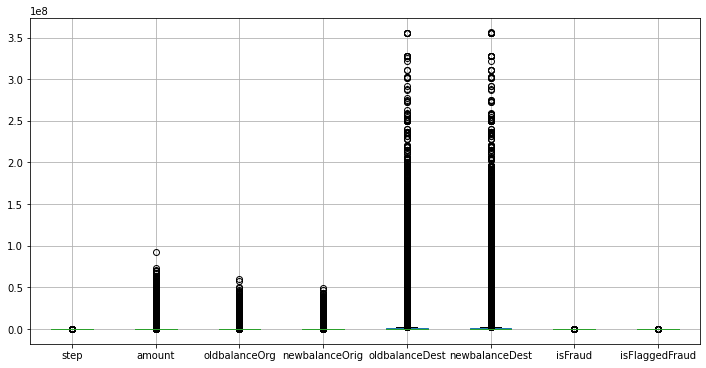

In [7]:
transactions.boxplot(figsize = (12, 6))

In [8]:
transactions.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


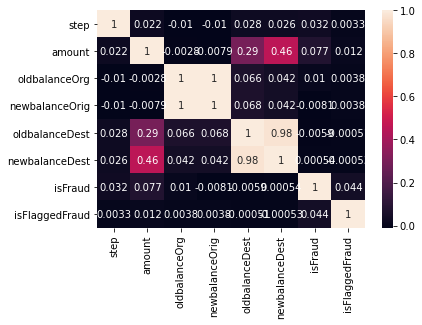

In [9]:
import seaborn as sns
sns.heatmap(transactions.corr(), annot = True)

In [10]:
transactions['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
725        4
245        4
655        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [11]:
transactions['amount'].value_counts()

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
13823.21          1
470212.13         1
129355.16         1
186818.92         1
2.00              1
Name: amount, Length: 5316900, dtype: int64

In [12]:
transactions['oldbalanceOrg'].value_counts()

0.00           2102449
184.00             918
133.00             914
195.00             912
164.00             909
                ...   
199874.26            1
1542602.40           1
4296800.61           1
2235106.02           1
10129112.74          1
Name: oldbalanceOrg, Length: 1845844, dtype: int64

In [13]:
transactions['newbalanceOrig'].value_counts()

0.00           3609566
3420.22              4
7717.83              4
17979.82             4
9897.82              4
                ...   
12051.21             1
25811.61             1
3166650.84           1
22797542.41          1
105006.27            1
Name: newbalanceOrig, Length: 2682586, dtype: int64

In [14]:
transactions['oldbalanceDest'].value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
28209542.84          1
529734.16            1
499717.38            1
531125.34            1
2011.42              1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [15]:
transactions['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
2384900.66           1
573230.90            1
444426.88            1
170489.19            1
324704.47            1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [16]:
transactions['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [17]:
"""Only 8213 transactions are fraud out of 6354407 """

'Only 8213 transactions are fraud out of 6354407 '

In [18]:
transactions['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [19]:
"""Only 16 transactions are considered as illegal attempts from the whole transactions."""

'Only 16 transactions are considered as illegal attempts from the whole transactions.'

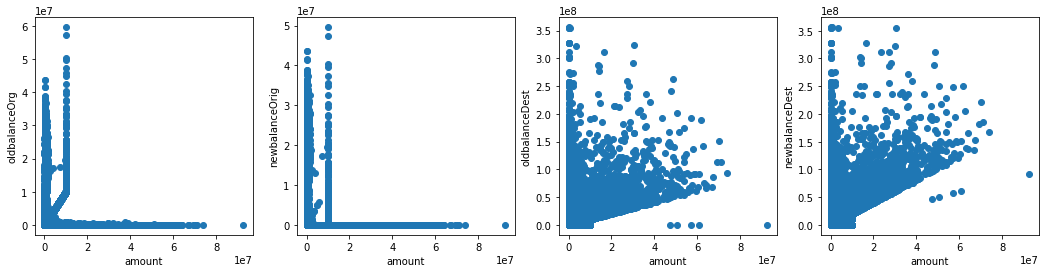

In [20]:
import matplotlib.pyplot as plt
x = transactions['amount']
colnames = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df = transactions[colnames]
f, ax = plt.subplots(1, 4, figsize = (18,4)) 
for i in range(len(colnames)):
    plt.sca(ax[i])
    plt.scatter(x, df[colnames[i]])
    plt.xlabel('amount')
    plt.ylabel(df[colnames[i]].name)

### What is the distribution of the outcome? 

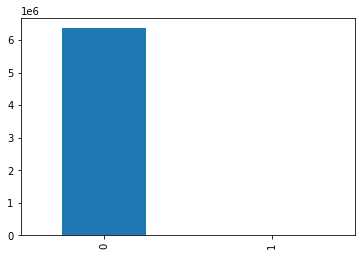

In [21]:
# Your response here
transactions['isFlaggedFraud'].value_counts().plot.bar()

In [22]:
"""Only 8213 transactions are fraud out of 6354407 Thats why its not showing in the bar chart"""

'Only 8213 transactions are fraud out of 6354407 Thats why its not showing in the bar chart'

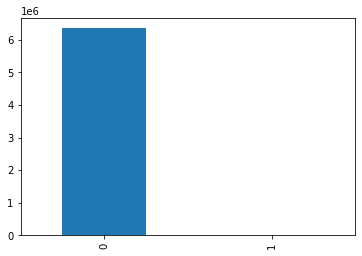

In [23]:
transactions['isFraud'].value_counts().plot.bar()

In [24]:
"""Only 16 transactions are considered as illegal attempts from the whole transactions. It's very small thats why its 
not there in the bar plot."""

"Only 16 transactions are considered as illegal attempts from the whole transactions. It's very small thats why its \nnot there in the bar plot."

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [25]:
# Your code here
from datetime import datetime, timedelta
start = datetime(1970, 1, 1)
transactions['date'] = transactions['step'].apply(lambda row: start + timedelta(hours=row))


In [26]:
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,date
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1970-01-01 01:00:00
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1970-01-01 01:00:00
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1970-01-01 01:00:00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1970-01-01 01:00:00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1970-01-01 01:00:00


In [27]:
# Cleaning the dataset:
# Removing categorical variable from the dataset
transactions_dummy = pd.get_dummies(data=transactions, columns=['type'], drop_first=True)

In [29]:
# Create a dummy dataframe from the variable 'type'
X = transactions_dummy.drop(['step','nameOrig','nameDest', 'isFraud', 'date'], axis=1)
y = transactions_dummy['isFraud']

### Run a logisitc regression classifier and evaluate its accuracy.

In [30]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 )

In [31]:
X_train.shape

(5090096, 10)

In [32]:
y_train.shape

(5090096,)

In [33]:
model = LogisticRegression().fit(X_train, y_train)

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.9976833442827011

### Now pick a model of your choice and evaluate its accuracy.

In [37]:
# Your code here
# Resampling random under - sampling
# Class count
count_class_0, count_class_1 = transactions_dummy['isFraud'].value_counts()

# Divide by class
df_class_0 = transactions_dummy[transactions_dummy['isFraud'] == 0]
df_class_1 = transactions_dummy[transactions_dummy['isFraud'] == 1]

Random under-sampling:
1    8213
0    8213
Name: isFraud, dtype: int64


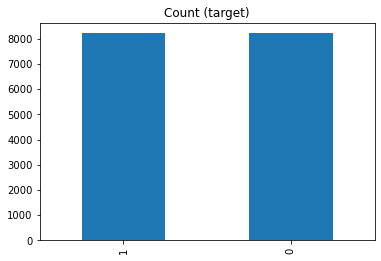

In [39]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['isFraud'].value_counts())

df_test_under['isFraud'].value_counts().plot(kind='bar', title='Count (target)');

In [40]:
under_sampled_x = df_test_under.drop(columns=['nameOrig' , 'nameDest', 'date','isFlaggedFraud', 'step', 'isFraud'])
under_sampled_y = df_test_under['isFraud']


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train_under_sampled, X_test_under_sampled, y_train_under_sampled, y_test_under_sampled = train_test_split(under_sampled_x, under_sampled_y, test_size = 0.2, random_state=42 )

In [43]:
model = LogisticRegression().fit(X_train_under_sampled, y_train_under_sampled)

In [44]:
y_pred_under_sampled = model.predict(X_test_under_sampled)
y_pred_under_sampled

array([1, 1, 0, ..., 1, 1, 1])

In [45]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test_under_sampled, y_pred_under_sampled)

0.8344491783323189

### Which model worked better and how do you know?

In [ ]:
# Your response here
"""From the above models for me the logistic regression gave more accuracy score which is 0.997 than the undersampled 
model which is 0.834. So, i would prefer logistic model better in this case. 
"""